In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from math import pi
from random import randint
import numpy.random as rand
import matplotlib.colors as colors
cconverter=colors.ColorConverter()

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
lat = np.linspace(-np.pi/2, np.pi/2, 60)
lon = np.linspace(-np.pi,   np.pi,  120)
r   = 100.
x3d = r * np.outer(np.cos(np.pi+lon), np.sin(np.pi/2 + lat))
y3d = r * np.outer(np.sin(np.pi+lon), np.sin(np.pi/2 + lat))
z3d = r * np.outer(np.ones(np.size(lon)), np.cos(np.pi/2 + lat))

In [4]:
f_surface = 0.35

In [5]:
el_colors = np.full(x3d.shape, "y", dtype=str)
N_elems = len(lat)*len(lon)
N_spots = int(f_surface*N_elems)
for n in range(N_spots):
    x_spot = rand.randint(0, x3d.shape[0])
    y_spot = rand.randint(0, x3d.shape[1])
    
    el_colors[x_spot, y_spot] = "r"

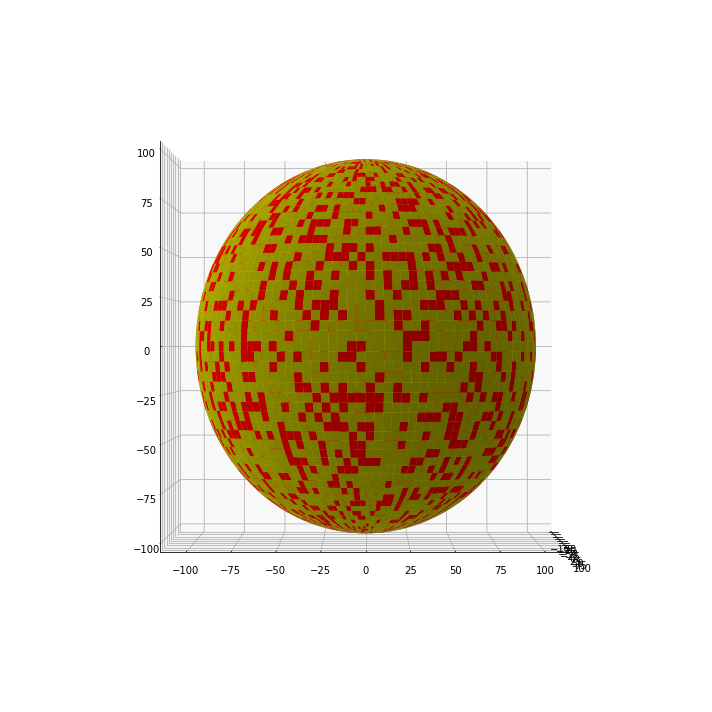

In [6]:
fig = plt.figure(figsize=(10,10))

ax  = fig.add_subplot(111, projection="3d")

sp = ax.plot_surface(x3d, y3d, z3d, rstride=1, cstride=1, facecolors=el_colors, linewidth=0)

ax.view_init(azim=0,elev=0)

fig.tight_layout()

In [7]:
fluxes = np.empty((lon.shape[0], lat.shape[0], 1))
specks = np.empty((lon.shape[0], lat.shape[0], 1), dtype="U1")

for i in range(len(lon)):
    for j in range(len(lat)):
        if el_colors[i, j] == 'r':
            b = 0.8
        else:
            b = 1.0
        fluxes[i, j] = b
        specks[i, j] = el_colors[i, j]
        
#for i in range(90):
#    for j in range(60):    
#        pl=plt.plot(x3d[i], y3d[j], 's', ms = 11.0, c=specks[30+i, j][0])
#        plt.plot(x3d[i], -3d[j], 's', ms = 11.0, c=specks[30+i, j][0])
#        plt.ylim(top=100)
#        plt.ylim(bottom = -100)

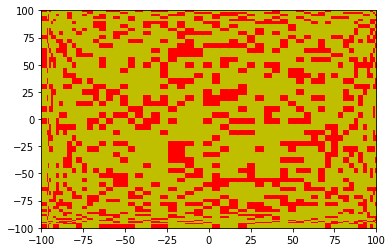

In [11]:
x  = r*np.sin(lon+np.pi/2)
y  = r*np.sin(lat)
zp = 30
for i in range(60):
    for j in range(60):
        if zp + i < x.shape[0]:
            k = zp + i
        elif zp + i >= 120:
            k = i - (x.shape[0] - zp)
        else:
            print("Whoops")
            break
        pl=plt.plot(-x[i], -y[j], 's', ms = 8.0, c=specks[k, j][0])
        plt.ylim(-r, r)
        plt.xlim(-r, r)

In [12]:
deltaX = []
deltaY = []

for i in range(len(x)-1):
    deltaX.append(np.absolute((x[i]-x[i+1])))
for i in range(len(y)-1):
    deltaY.append(np.absolute((y[i]-y[i+1])))




119
59
[0.14173043232381133, 0.42478954666248114, 0.7066445488792539, 0.9864964903477897, 1.263552100335076, 1.5370260346134614, 1.8061431016042775, 2.0701404597425324, 2.3282697798341587, 2.5797993662765464, 2.8240162311291215, 3.0602281151551267, 3.287765450105738, 3.5059832566838907, 3.714262972808257, 3.9120142069946127, 4.098676411884675, 4.2737204731785, 4.43665020946645, 4.587003778709224, 4.724354987379478, 4.848314498553471, 4.9585309355290335, 5.0546918778409236, 5.136524746850618, 5.203797578400046, 5.256319680339255, 5.293942173063887, 5.3165584115308295, 5.324104287554951, 5.3165584115308295, 5.293942173063887, 5.256319680339233, 5.203797578400046, 5.136524746850618, 5.0546918778409236, 4.9585309355290335, 4.848314498553492, 4.724354987379478, 4.587003778709224, 4.436650209466443, 4.2737204731785, 4.098676411884668, 3.9120142069946127, 3.714262972808257, 3.5059832566838907, 3.287765450105738, 3.060228115155141, 2.8240162311291073, 2.5797993662765464, 2.3282697798341587, 2.

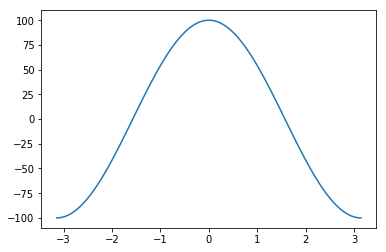

In [13]:
print(len(deltaX))
print(len(deltaY))
print(deltaY)
print(deltaX)
plt.plot(lon,x)

In [ ]:
 b